Version Date: June 26, 2022

# Objectives
- Introduce students to key ML concepts including the workflow of regression models, feature selection, and evaluation of feature importance as part of the scientific discovery process.
- Understand the regression model and build models that predict the Calculated Absorbance.
- Understand the feature importance and feature selection to improve and interpret model performances
- Evaluate the results of the models

# Getting started

- Begin by watching this [brief (3 minute) YouTube video introduction to Google Colab](https://www.youtube.com/watch?v=inN8seMm7UI) and/or [reading this short (1 page) introductory explanation](https://colab.research.google.com/notebooks/intro.ipynb)
- Colab notebooks consist of text cells (like this one) and program code cells, like the one shown below.  Code cells are executed by typing the Cmd+Enter keys (or Ctrl-Enter). You can also execute a code cell by mousing over the `[ ]` symbol in the upper left hand side of the code cell---when you hover over it it will turn into a "play" button, and clicking the play button will execute the code cell. You can find other options for executing groups of cells in the "Runtime" menu above.

In [ ]:
# This is a code cell

## Basics of Python
Like other programming languages, Python includes libraries, variables and functions.

## Loading Python Libraries

Take a moment to look at this code block:
- `import` loads a module 
- `import ... as` allows you to assign a short alias to the module
- `from ... import` loads a small portion of a module
- observe that the `import`, `as` and `from` keywords are color coded purple.  
- `#` indicates a comment (observe that all of the text following the `#` is color coded green).  This text is not interpreted by the computer, and its goal is to provide the human with some information about what is happening.  

What do each of these program modules do?  You can think of them as being like a library of books that accomplish program tasks.  In general, they can be quite complicated.  In most cases, you will never learn all of the functionality of a module, and will have to use the documentation to help you determine the relevant parts for solving your problem.  It is useful to have a general sense of the types of tasks that each of modules do, so that you can find the appropriate functionality.

- [pandas](http://pandas.pydata.org) is a library for handling datasets
- [numpy](https://numpy.org/) and [scipy](https://www.scipy.org/) are libraries for mathematical and scientific computing
- [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) are libraries for data visualization
- [sklearn](https://scikit-learn.org/stable/) is a library for machine learning

In [ ]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax

#to split train and test dataset
from sklearn.model_selection import train_test_split

# For Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

#to split train and test dataset
from sklearn.model_selection import train_test_split

#for model evaluations
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# for feature selection
from sklearn.feature_selection import SelectKBest, chi2

## Variables and Functions

- **Variable** : a reserved memory location to store values.
Simply, it's like a container that holds data that can be changed later in the program. For example to create a variable named `number` and assign its value as `100`:

```
    number = 100
```

This variable can be modified at any time.
```
    number = 100
    number = 1 
```

The value of `number` has changed to 1.

- **Function** : a block of code which only runs when it is called. Functions are defined using the `def` keyword. Functions can take user-provided input values, called **arguments**.

For example, let's define an `absolute_value` function as below, which takes one argument, the number for which the absolute value should be calculated.
```
def absolute_value(num):
    if num >= 0:
        return num
    else:
        return -num
```
The output of `absolute_value(2)` is 2, and `absolute_value(-4)` is 4.

# Get and Preprocess our Data
Now let's load in the training and test datasets, which are stored on GitHub. To do this, we will need to use a **module**.
Using a built-in method of a module is carried out by writing: `[module_name].[method]`

For example, to use the `read_csv` method of the `pandas` module: `pd.read_csv()`.  With this method, CSV files are read as a **DataFrame** structure, which is similar to a table. For more on DataFrames:
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html)
- [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) documentation





In [ ]:
# Extract the chem data and read it
dataset = pd.read_csv('https://raw.githubusercontent.com/ferdmartin/pchem/main/dataset_20220531.csv')

Let's see how data looks like. You can display the current contents of a variable by entering its name and executing the cell:

In [ ]:
# display the contents of the variable "dataset"
dataset

,SMILES,InChIKey,AromaticRingCount,HBondDonorCount,HBondAcceptorCount,FractionCarbonSP3,Chi0n,Chi1n,Chi2n,Chi3n,...,HeteroatomCount,HeterocycleCount,RotatableBondCount,MolecularMass,DegreeOfUnsaturation,MinEllipsoidLength,MaxDistance,LongestPiChain,LinkerLength,CalculatedAbsorbance
0,CCN1C(=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,AGJZCWVTGOVGBS-UHFFFAOYSA-N,3,0,1,0.173913,14.814194,8.994514,6.266885,4.873974,...,2,2,3,327.451,13,121.729874,13.503105,12,2,529
1,CCN1C(=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HQCBCYUEDZNVBO-UHFFFAOYSA-N,3,0,1,0.160000,15.968895,9.661181,6.648331,5.112179,...,2,2,4,353.489,14,324.767831,16.757560,14,4,626
2,CCN1C(=CC=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HUKKJPBJMKANKC-UHFFFAOYSA-N,3,0,1,0.148148,17.123595,10.327848,7.033231,5.334401,...,2,2,5,379.527,15,496.435053,17.847106,16,6,736
3,CCN1C=CC(=CC=Cc2cc[n+](CC)c3ccccc23)c2ccccc21,TVRUNVZRBXNONE-UHFFFAOYSA-N,3,0,1,0.160000,15.968895,9.653015,6.674271,5.149989,...,2,2,4,353.489,14,589.642186,15.734821,12,4,701
4,CCN1c2ccccc2OC1=CC=Cc1[n+](CC)c2ccccc2o1,VZUFSMBGWBLOCB-UHFFFAOYSA-N,3,0,3,0.190476,14.475990,8.656310,5.830350,4.383276,...,4,2,4,333.411,12,425.762234,13.991775,12,4,512
5,CCN1c2ccccc2OC1=CC=CC=Cc1[n+](CC)c2ccccc2o1,VAGJCLDZLVQVPR-UHFFFAOYSA-N,3,0,3,0.173913,15.630691,9.322977,6.215250,4.605498,...,4,2,5,359.449,13,302.024873,17.841229,14,6,609
6,CCN1c2ccccc2OC1=CC=CC=CC=Cc1[n+](CC)c2ccccc2o1,YFMAIXBXQGUOBW-UHFFFAOYSA-N,3,0,3,0.160000,16.785391,9.989644,6.600151,4.827721,...,4,2,6,385.487,14,437.000961,18.546759,16,8,698
7,CCN1c2ccccc2SC1=Cc1[n+](CC)c2ccccc2s1,WCJHMNADZOKGGL-UHFFFAOYSA-N,3,0,3,0.210526,13.321290,7.989644,5.448904,4.152623,...,4,2,3,339.509,11,226.789832,13.322754,11,2,418
8,CCN1c2ccccc2SC1=CC=Cc1[n+](CC)c2ccccc2s1,JGLWGLKNDHZFAP-UHFFFAOYSA-N,3,0,3,0.190476,14.475990,8.656310,5.830350,4.383276,...,4,2,4,365.547,12,215.273715,14.430508,13,4,521
9,CCN1c2ccccc2SC1=CC=CC=Cc1[n+](CC)c2ccccc2s1,FYXWDSGGZAMYFZ-UHFFFAOYSA-N,3,0,3,0.173913,15.630691,9.322977,6.215250,4.605498,...,4,2,5,391.585,13,569.042656,16.729475,15,6,615


* Each row contains data for a different molecule
* The numbers to the left the first column (0, 1, ...) represent the index of each row

**Features:**

*   SMILES: SMILES is an unique chemical identifier in the form of an ASCII string. First we will go through the lists of FPs and FNs to get the SMILES strings and molecule names;
*   InChIKey
*   AromaticRingCount
*   HBondDonorCount
*   HBondAcceptorCount
*   FractionCarbonSP3
*   Chi0n
*   Chi1n
*   Chi2n
*   Chi3n
*   Chi4n
*   HeteroatomCount
*   HeterocycleCount
*   RotatableBondCount
*   MolecularMass
*   DegreeOfUnsaturation
*   MinEllipsoidLength
*   MaxDistance
*   LongestPiChain
*   LinkerLength
*   CalculatedAbsorbance


## Data Selection with Pandas
We will often need to access the values stored in particular positions in a variable. We can do this using the indices corresponding to that position:
- `iloc[row index, column index] `is used for position based data selection
- `:` is used for selecting a range of index values
- Note that in Python, index values start from `0` instead of `1`

For example:
- `iloc[1:3,0]` : select row indices 1 to 2 (i.e., second and third rows) and the first column
- `iloc[:,0]` : select all rows and the first column
- `iloc[:,2:5]`: select all rows and column indices 2 to 4 (i.e., third through fifth columns)

In [ ]:
# this line of code returns the first row and first column of the training data
dataset.iloc[0,0]

'CCN1C(=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21'

In [ ]:
# this line of code returns the first three rows and first 10 columns of the training data
dataset.iloc[0:3,0:10]

,SMILES,InChIKey,AromaticRingCount,HBondDonorCount,HBondAcceptorCount,FractionCarbonSP3,Chi0n,Chi1n,Chi2n,Chi3n
0,CCN1C(=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,AGJZCWVTGOVGBS-UHFFFAOYSA-N,3,0,1,0.173913,14.814194,8.994514,6.266885,4.873974
1,CCN1C(=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HQCBCYUEDZNVBO-UHFFFAOYSA-N,3,0,1,0.160000,15.968895,9.661181,6.648331,5.112179
2,CCN1C(=CC=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HUKKJPBJMKANKC-UHFFFAOYSA-N,3,0,1,0.148148,17.123595,10.327848,7.033231,5.334401


In [ ]:
# guess what the output of this line of code will be
dataset.iloc[0:3,0:3]

,SMILES,InChIKey,AromaticRingCount
0,CCN1C(=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,AGJZCWVTGOVGBS-UHFFFAOYSA-N,3
1,CCN1C(=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HQCBCYUEDZNVBO-UHFFFAOYSA-N,3
2,CCN1C(=CC=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HUKKJPBJMKANKC-UHFFFAOYSA-N,3


## Identifying dependent (y) and independent variables (X)
- X is an array of independent variables. 
- y is a dependent variable or target that we would want to predict.

**CalculatedAbsorbance** is the target value for this data set, and the other features are the independent variables.

For the machine learning models we will be developing, we omit non-numerical variables for simplicity.

In [ ]:
X = dataset.iloc[:,0:-1] # Independent columns
X.drop(['SMILES', 'InChIKey'], axis=1, inplace=True) # Eliminate non-numerical features
y = dataset.iloc[:,-1] # Target column (Calculated Absorbance)

## Split Train & Test Data

To evaluate or check our model's performance, we need a test data set. We will randomly split our data into train set and test set using `train_test_split` module of `sklearn` library.

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size =0.1,random_state = 0)

In [ ]:
# display Xtrain set
Xtrain

,AromaticRingCount,HBondDonorCount,HBondAcceptorCount,FractionCarbonSP3,Chi0n,Chi1n,Chi2n,Chi3n,Chi4n,HeteroatomCount,HeterocycleCount,RotatableBondCount,MolecularMass,DegreeOfUnsaturation,MinEllipsoidLength,MaxDistance,LongestPiChain,LinkerLength
2,3,0,1,0.148148,17.123595,10.327848,7.033231,5.334401,3.926316,2,2,5,379.527,15,496.435053,17.847106,16,6
10,3,0,3,0.160000,16.785391,9.989644,6.600151,4.827721,3.474403,4,2,6,417.623,14,1280.653595,18.702037,17,8
6,3,0,3,0.160000,16.785391,9.989644,6.600151,4.827721,3.474403,4,2,6,385.487,14,437.000961,18.546759,16,8
1,3,0,1,0.160000,15.968895,9.661181,6.648331,5.112179,3.799168,2,2,4,353.489,14,324.767831,16.757560,14,4
7,3,0,3,0.210526,13.321290,7.989644,5.448904,4.152623,3.078613,4,2,3,339.509,11,226.789832,13.322754,11,2
8,3,0,3,0.190476,14.475990,8.656310,5.830350,4.383276,3.218955,4,2,4,365.547,12,215.273715,14.430508,13,4
3,3,0,1,0.160000,15.968895,9.653015,6.674271,5.149989,3.714736,2,2,4,353.489,14,589.642186,15.734821,12,4
0,3,0,1,0.173913,14.814194,8.994514,6.266885,4.873974,3.666399,2,2,3,327.451,13,121.729874,13.503105,12,2
5,3,0,3,0.173913,15.630691,9.322977,6.215250,4.605498,3.346103,4,2,5,359.449,13,302.024873,17.841229,14,6


In [ ]:
# display Xtest set
Xtest

,AromaticRingCount,HBondDonorCount,HBondAcceptorCount,FractionCarbonSP3,Chi0n,Chi1n,Chi2n,Chi3n,Chi4n,HeteroatomCount,HeterocycleCount,RotatableBondCount,MolecularMass,DegreeOfUnsaturation,MinEllipsoidLength,MaxDistance,LongestPiChain,LinkerLength
4,3,0,3,0.190476,14.475990,8.656310,5.83035,4.383276,3.218955,4,2,4,333.411,12,425.762234,13.991775,12,4
9,3,0,3,0.173913,15.630691,9.322977,6.21525,4.605498,3.346103,4,2,5,391.585,13,569.042656,16.729475,15,6


## Data Scaling
Scaling our features is a good practice in the world of Data Science and Machine Learning since some models perform better when the variables are on the same scale. There are many ways and methods to scale our variables; in summary:


*   Scaling: Scale our features in a specified range (i.e., between 0 and 1) without altering the distribution shape; for example, [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).
*   Normalizing: Scale our features, usually altering the distribution shape. Some techniques are [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard%20scaler#sklearn-preprocessing-standardscaler) and [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html?highlight=robust%20scaler#sklearn-preprocessing-robustscaler).

Let's scale all of our features to a range between 0 and 1.

In [ ]:
# import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Scale our Train and Test data sets and set everything into dataframes again
XtrainScaled = scaler.fit_transform(Xtrain)
XtestScaled = scaler.transform(Xtest)
Xtrain = pd.DataFrame(XtrainScaled, index=Xtrain.index, columns= Xtrain.columns)
Xtest = pd.DataFrame(XtestScaled, index=Xtest.index, columns= Xtest.columns)

In [ ]:
Xtrain

,AromaticRingCount,HBondDonorCount,HBondAcceptorCount,FractionCarbonSP3,Chi0n,Chi1n,Chi2n,Chi3n,Chi4n,HeteroatomCount,HeterocycleCount,RotatableBondCount,MolecularMass,DegreeOfUnsaturation,MinEllipsoidLength,MaxDistance,LongestPiChain,LinkerLength
2,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.666667,0.577519,1.00,0.323322,0.841070,0.833333,0.666667
10,0.0,0.0,1.0,0.190000,0.911053,0.855357,0.726647,0.571256,0.466897,1.0,0.0,1.000000,1.000000,0.75,1.000000,1.000000,1.000000,1.000000
6,0.0,0.0,1.0,0.190000,0.911053,0.855357,0.726647,0.571256,0.466897,1.0,0.0,1.000000,0.643614,0.75,0.272038,0.971134,0.833333,1.000000
1,0.0,0.0,0.0,0.190000,0.696316,0.714881,0.757058,0.811960,0.850008,0.0,0.0,0.333333,0.288759,0.75,0.175195,0.638525,0.500000,0.333333
7,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.133722,0.00,0.090653,0.000000,0.000000,0.000000
8,0.0,0.0,1.0,0.678571,0.303684,0.285119,0.240762,0.195175,0.165555,1.0,0.0,0.333333,0.422481,0.25,0.080716,0.205930,0.333333,0.333333
3,0.0,0.0,0.0,0.190000,0.696316,0.711388,0.773431,0.843953,0.750407,0.0,0.0,0.333333,0.288759,0.75,0.403747,0.448399,0.166667,0.333333
0,0.0,0.0,0.0,0.413043,0.392631,0.429762,0.516295,0.610394,0.693387,0.0,0.0,0.000000,0.000000,0.50,0.000000,0.033527,0.166667,0.000000
5,0.0,0.0,1.0,0.413043,0.607369,0.570238,0.483705,0.383215,0.315547,1.0,0.0,0.666667,0.354855,0.50,0.155571,0.839977,0.500000,0.666667


In [ ]:
Xtest

,AromaticRingCount,HBondDonorCount,HBondAcceptorCount,FractionCarbonSP3,Chi0n,Chi1n,Chi2n,Chi3n,Chi4n,HeteroatomCount,HeterocycleCount,RotatableBondCount,MolecularMass,DegreeOfUnsaturation,MinEllipsoidLength,MaxDistance,LongestPiChain,LinkerLength
4,0.0,0.0,1.0,0.678571,0.303684,0.285119,0.240762,0.195175,0.165555,1.0,0.0,0.333333,0.066096,0.25,0.262340,0.124370,0.166667,0.333333
9,0.0,0.0,1.0,0.413043,0.607369,0.570238,0.483705,0.383215,0.315547,1.0,0.0,0.666667,0.711241,0.50,0.385973,0.633304,0.666667,0.666667


# Building Regression Models

Linear Regression is a process of **explaining and defining the relationship between variables**. These variables are independent and dependent.

**Independent variables** are not affected by others and vary independently. In contrast, a **dependent variable** is affected by independent variables and changes according to the independent variables. Typically, we want to know or predict what is the dependent variable according to independent variables. So regression is a process of learning and understanding the relationship between these two types of variables.

For our project, we will utilize 18 features as our independent variables, and our dependent variable will be **Calculated Absorbance**.


We will make several regression models to predict our target value, `Calculated Absorbance`. Moreover, by selecting better independent variables (**feature selection process**), we could also improve our model performances (**model evaluation**) and by interpreting the results according to independent variables (**feature importance**).

## Simple Linear regression
Simple linear regression is a method that [tries to define the relationship between two variables](https://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf). 

This relationship can be represented with a well-fitted line that follows:
$$
\hat{Y}=β_0+β_1X
$$
Being:
* $β_0$: $y$ intercept
* $β_1$: slope (coefficient/weight)

Now that we know how a simple linear regression model works, we are going to train our first machine learning model (simple linear regression) by selecting one feature from our set of independent variables and plotting the line that best describes the relationship between our selected feature and the dependent variable (Calculated Absorbance).

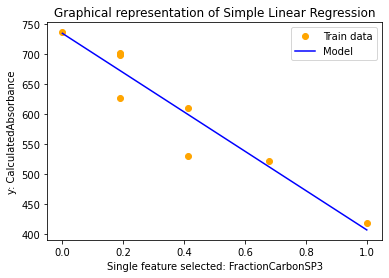

In [ ]:
# select our independent feature
single_feature_lr = 'FractionCarbonSP3'

single_feature_lr_X_train = np.reshape(Xtrain[single_feature_lr].values, (-1,1))
single_feature_lr_X_test = np.reshape(Xtest[single_feature_lr].values, (-1,1))

# fit our linear reggression model
regressor = LinearRegression()
regressor.fit(single_feature_lr_X_train, ytrain)

# plot a graphical representation of the model
plt.plot(single_feature_lr_X_train, ytrain, 'o', color='orange')
plt.plot(np.linspace(min(single_feature_lr_X_train), max(single_feature_lr_X_train),100), 
         regressor.intercept_+regressor.coef_ * np.linspace(min(single_feature_lr_X_train), max(single_feature_lr_X_train),100),
         color='b')
plt.xlabel('Single feature selected: {}'.format(single_feature_lr))
plt.ylabel('y: CalculatedAbsorbance')
plt.legend(['Train data', 'Model'])
plt.title('Graphical representation of Simple Linear Regression');

As we can see, the blue line tries to generalize the values of $y$, however it is not completely precise since there is variability involved. This variability is represented by a random error component ($ϵ$). Therefore, if we would like to represent the true value of $Y$, then we would have to add this error component to our equation:

$$
Y=β_0+β_1X+ϵ
$$


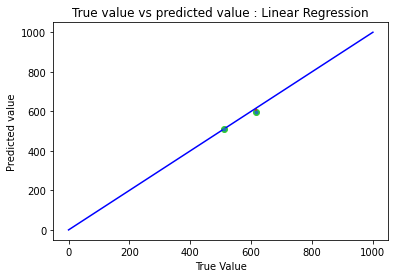

In [ ]:
# predicting the test set results
y_pred_simple_lr = regressor.predict(single_feature_lr_X_test)

# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value

x = np.linspace(0,1000,100)
y = x
fig, ax = plt.subplots()
plt.plot(x, y, '-b')
plt.scatter(ytest, y_pred_simple_lr, color = 'limegreen')
plt.errorbar(ytest, y_pred_simple_lr, yerr=[(y_pred_simple_lr - ytest), (0,0)], fmt='.', ecolor='red')
plt.xlabel("True Value")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

## Multiple Regression

When we are working with more than one independent variable we will make use of a **multiple regression model**. A multiple regression model could be more precise towards predicting the value of a depedent variable since we are giving our model more information to work with. Equation-wise, the formula looks similar to what we have seen before:
$$
\hat{Y}=β_0+β_1X_1+β_2X_2+...+B_kX_k
$$
where:
  * $k$: Number of independent feature our model uses.

And consecuently,
$$
Y=β_0+β_1X_1+β_2X_2+...+B_kX_k+ϵ
$$

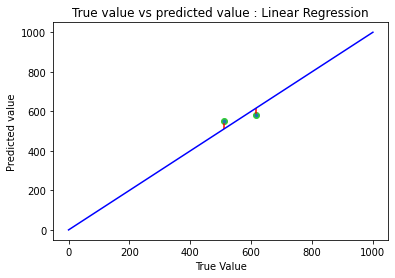

In [ ]:
# fit our linear reggression model
regressor_mr = LinearRegression()
regressor_mr.fit(Xtrain, ytrain)
# predicting the test set results
y_pred_lr = regressor_mr.predict(Xtest)

# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
x = np.linspace(0,1000,100)
y = x
fig, ax = plt.subplots()
plt.plot(x, y, '-b')
plt.scatter(ytest, y_pred_lr, color = 'limegreen')
plt.errorbar(ytest, y_pred_lr, yerr=[(y_pred_lr - ytest), np.zeros(len(ytest))], fmt='.', ecolor='red')
plt.xlabel("True Value")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

At a glance, we can see that the green dots in the Multiple Regression graph are farther than the ones in the Simple Linear Regression graph, meaning that the predicted value results are more distant in the more complex model (Multiple Regression). This behavior is an example of overfitting that we will discuss later in this notebook.

# Model Evaluation

As we previously saw in the case of simple linear regression, machine learning models are far from perfection since models generalize but they don't do magic (even when there are times that it seems like magic). To know how well our models perform, we use [metrics on test data](https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide).

Given that we are working with continuous outputs, let's consider the following three metrics to evaluate how good our model predictions are:

- Mean Absolute Error (MAE): Measures average absolute difference between the actual value $y$ and the predicted value $\hat{y}$. The lower error, the better is performing our model.
$$
MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|
$$
  Where:
  * $n$: number of data points/observations
  * $y_i$: actual value
  * $\hat{y}_i$: predicted value

- Mean Squared Error (MSE): One of the most used metrics for this kind of models. This metric tells how close a trained model is to the observations. The lower error, the better is performing our model.
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$
- Root Mean Squared Error (RMSE): RMSE is a metric that helps us heuristically to compare how good our model is performing. The Root Mean Squared Error outlines the standard deviation of the residuals (errors). The lower error, the better is performing our model.
$$
RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}}
$$
- R² ([Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)): This metric says how well our model is fitted to the data by comparing it to the average line of the dependent variable.

$$
R^2 = 1- \frac{∑(y_i-\hat{y}_i)^2}{∑(yᵢ-\bar{y})^2}
$$

But still, it is a good practice to see how the data behaves with our own eyes through data visualization, given that sometimes a single number (metrics) cannot explain the
[whole picture](https://blog.revolutionanalytics.com/2017/05/the-datasaurus-dozen.html).


In [ ]:
# One single function for all metrics
def ModelEvaluation(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred)**(1/2)
  r2 = r2_score(y_true, y_pred)
  return {'MAE': mae,'MSE': mse,'RMSE': rmse, 'R2': r2}  

In [ ]:
metrics_simple_lr = ModelEvaluation(ytest, y_pred_simple_lr)
metrics_multiple_lr = ModelEvaluation(ytest, y_pred_lr)
pd.DataFrame({'Simple Linear Regression':metrics_simple_lr,
              'Multiple Regression': metrics_multiple_lr})

,Simple Linear Regression,Multiple Regression
MAE,8.125859,37.818049
MSE,130.293918,1438.576543
RMSE,11.414636,37.928572
R2,0.950874,0.457601


So far, when we evaluate the two regression models we have been working with, we can see that the Simple Linear Regression works better according to their plots and the metrics.

# Combination of Features (experiments)

What if we make some combinations of features? Sometimes this process of creating new features to develop better models from the ones we already have, either combining them or applying some other operations, is called [Feature Engineering](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/).

As we can recall from our Python introduction, our tables are stored in Python variables. Given that our tables are saved in variables, we can experiment with them and then keep our changes in new variables or update the ones we have.

If we would like to create a new column using another one we already have, we only have to state the name of the new column, and what is the operation we want to apply simply by following the structure:

`table['new_column'] = table['column_1'] + table['column_2']`

or 

`table['new_column'] = table['column_1'] * table['column_2']`

or any other arithmetic operation.

**Example**: 

We are working with `grades` that contains all students' grades from class A, B, and C.

|Student | Class_A | Class_B| Class_C|
-----|-----|-----| -----|
|Student 1|91|95|78|
|Student 2|96|87|90|
|Student 3|79|89|92|
|Student 4|86|72|80|

We have been asked to determine the average grade for each student and store the result into a new feature called `Average_Grade`. To obtain this number, we can do the following:

`grades['Average_Grade'] = (grades['Class_A'] + grades['Class_B'] + grades['Class_C'])/3`

And consequently, we obtain the following result:

|Student | Class_A | Class_B| Class_C| Average_Grade|
-----|-----|-----|-----|-----|
|Student 1|91|95|78|88|
|Student 2|96|87|90|91|
|Student 3|79|89|92|87|
|Student 4|86|72|80|83|


In [ ]:
# Create a function that predicts and generates the metrics for our experiments
def predict_and_score(Train_data, Test_data, y_train, y_test):
  regressor = LinearRegression()
  regressor.fit(Train_data, y_train)
  # predicting the test set results
  y_pred = regressor.predict(Test_data)
  return pd.DataFrame({'Experiment': ModelEvaluation(y_test, y_pred)}).transpose()

In [ ]:
# Experiment 1 - Sum of all ChinNn
exp1_train = Xtrain.copy()
exp1_test = Xtest.copy()

# SumOfChiXn = Chi0n+Chi1n+Chi2n+Chi3n+Chi4n
exp1_train['SumOfChiXn'] = exp1_train['Chi0n'] + exp1_train['Chi1n'] + exp1_train['Chi2n'] + exp1_train['Chi3n'] + exp1_train['Chi4n']
exp1_test['SumOfChiXn'] = exp1_test['Chi0n'] + exp1_test['Chi1n'] + exp1_test['Chi2n'] + exp1_test['Chi3n'] + exp1_test['Chi4n']

# Use are new predict_and_score function
metrics_exp1 = predict_and_score(exp1_train, exp1_test, ytrain, ytest)
metrics_exp1

,MAE,MSE,R2,RMSE
Experiment,51.340714,2756.532115,-0.039318,52.502687


In [ ]:
# Experiment 2 - Average of all ChinNn
exp2_train = Xtrain.copy()
exp2_test = Xtest.copy()

# AvgOfChiXn = (Chi0n+Chi1n+Chi2n+Chi3n+Chi4n)/5
exp2_train['AvgOfChiXn'] = (exp2_train['Chi0n'] + exp2_train['Chi1n'] + exp2_train['Chi2n'] + exp2_train['Chi3n'] + exp2_train['Chi4n'])/5
exp2_test['AvgOfChiXn'] = (exp2_test['Chi0n'] + exp2_test['Chi1n'] + exp2_test['Chi2n'] + exp2_test['Chi3n'] + exp2_test['Chi4n'])/5

# Use are new predict_and_score function
metrics_exp2 = predict_and_score(exp2_train, exp2_test, ytrain, ytest)
metrics_exp2

,MAE,MSE,R2,RMSE
Experiment,39.687645,1591.205877,0.400054,39.889922


In [ ]:
# Experiment 3 - Combine Experiment 1 and Experiment 2
exp3_train = Xtrain.copy()
exp3_test = Xtest.copy()

# SumOfChiXn = Chi0n+Chi1n+Chi2n+Chi3n+Chi4n
exp3_train['SumOfChiXn'] = exp3_train['Chi0n'] + exp3_train['Chi1n'] + exp3_train['Chi2n'] + exp3_train['Chi3n'] + exp3_train['Chi4n']
exp3_test['SumOfChiXn'] = exp3_test['Chi0n'] + exp3_test['Chi1n'] + exp3_test['Chi2n'] + exp3_test['Chi3n'] + exp3_test['Chi4n']

# AvgOfChiXn = (Chi0n+Chi1n+Chi2n+Chi3n+Chi4n)/5
exp3_train['AvgOfChiXn'] = (exp3_train['Chi0n'] + exp3_train['Chi1n'] + exp3_train['Chi2n'] + exp3_train['Chi3n'] + exp3_train['Chi4n'])/5
exp3_test['AvgOfChiXn'] = (exp3_test['Chi0n'] + exp3_test['Chi1n'] + exp3_test['Chi2n'] + exp3_test['Chi3n'] + exp3_test['Chi4n'])/5

# Use are new predict_and_score function
metrics_exp3 = predict_and_score(exp3_train, exp3_test, ytrain, ytest)
metrics_exp3

,MAE,MSE,R2,RMSE
Experiment,51.477151,2772.360374,-0.045286,52.653209


In [ ]:
# Experiment 4 - HeteroatomCount * HeterocycleCount
exp4_train = Xtrain.copy()
exp4_test = Xtest.copy()

# HACxHCC = HeteroatomCount * HeterocycleCount
exp4_train['HACxHCC'] = exp4_train['HeteroatomCount'] * exp4_train['HeterocycleCount']
exp4_test['HACxHCC'] = exp4_test['HeteroatomCount'] * exp4_test['HeterocycleCount'] 

# Use are new predict_and_score function
metrics_exp4 = predict_and_score(exp4_train, exp4_test, ytrain, ytest)
metrics_exp4

,MAE,MSE,R2,RMSE
Experiment,37.818049,1438.576543,0.457601,37.928572


In [ ]:
# Experiment 5 - HeteroatomCount * HeterocycleCount * RotatableBondCount / MolecularMass
exp5_train = Xtrain.copy()
exp5_test = Xtest.copy()

# Exp5 = HeteroatomCount * HeterocycleCount * RotatableBondCount / MolecularMass
exp5_train['Exp5'] = exp5_train['HeteroatomCount'] * exp5_train['HeterocycleCount'] * exp5_train['RotatableBondCount'] / (exp5_train['MolecularMass']+0.0001)
exp5_test['Exp5'] = exp5_test['HeteroatomCount'] * exp5_test['HeterocycleCount'] * exp5_test['RotatableBondCount'] / (exp5_test['MolecularMass']+0.0001)

# Use are new predict_and_score function
metrics_exp5 = predict_and_score(exp5_train, exp5_test, ytrain, ytest)
metrics_exp5

,MAE,MSE,R2,RMSE
Experiment,37.818049,1438.576543,0.457601,37.928572


## Overfitting

Overfitting happens when a model tries to adapt/fit too much to the training data, and then when we use it for unseen data performs deficiently. Moreover, overfitting happens when a model is overly complicated because there are too many variables compared to the number of observations. A perfect example of overfitting is what we already observed during the Multiple Regression Model.

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#The-Bias-variance-trade-off)
* [Wikipedia](https://en.wikipedia.org/wiki/Overfitting)
* [Scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html) documentation

# Feature Selection

This process selects better factors for the model by eliminating some independent variables (features) from the training. Reducing the number of features/attributes could help the algorithm perform better since there could be misleading variables or the model was overfitting, and we smooth its complexity by selecting fewer features.

To improve our previous results, let's try the following feature selection techniques:


*   Pearson Correlation
*   SelectKBest Features



## Pearson Correlation

The Pearson Correlation is one way to determine what values are relevant for our machine learning model.

This value is range from -1 to 1. An exact 0 means there is no [correlation](https://en.wikipedia.org/wiki/Correlation) between two.
- If value if closer to 0, it means weaker correlation. 
- If the value is closer to 1, it means it has stronger positive correlation. And if the value is closer to -1, it's the other way around.

We are only concerned about the absolute value of the correlation as the direction is not relevant for this exercise.

In [ ]:
# Get pearson Correlation between all features
P_correlation = pd.DataFrame(Xtrain.merge(ytrain, right_index=True, left_index=True).corr()['CalculatedAbsorbance'].dropna())
# 
P_correlation = np.abs(P_correlation).sort_values(by='CalculatedAbsorbance', ascending=False)[1:]
P_correlation.columns = ['CalculatedAbsorbance Correlation']
P_correlation.style.background_gradient(cmap ='RdYlBu')

,CalculatedAbsorbance Correlation
Chi1n,0.976336
Chi0n,0.976104
DegreeOfUnsaturation,0.949393
FractionCarbonSP3,0.945864
Chi2n,0.938902
MaxDistance,0.839050
Chi3n,0.818207
RotatableBondCount,0.758201
LinkerLength,0.758201
LongestPiChain,0.755273


Now let's try our model using only the feature with he highest correlation

In [ ]:
# select our independent feature
single_feature_lr = 'Chi1n'

most_correlated_lr_X_train = np.reshape(Xtrain[single_feature_lr].values, (-1,1))
most_correlated_lr_X_test = np.reshape(Xtest[single_feature_lr].values, (-1,1))

# fit our linear reggression model
regressor = LinearRegression()
regressor.fit(most_correlated_lr_X_train, ytrain)
y_pred_most_correlated_lr = regressor.predict(most_correlated_lr_X_test)

metrics_most_correlated_lr = ModelEvaluation(ytest, y_pred_most_correlated_lr)
pd.DataFrame([metrics_most_correlated_lr])

,MAE,MSE,RMSE,R2
0,5.649799,53.200488,7.293866,0.979941


## [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) - Scikit learn method

In statistics, there are multiple methods we can use to help our model to improve its performance. In this exercise, we will use the SelectKBest module.

- SelectKBest selects features according to the k highest scores.
- The score we are using is the [F-value](https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-f-value) which is a ratio between two [variances](https://en.wikipedia.org/wiki/Variance).

In [ ]:
# Apply SelectKBest class to extract top k best features
number_of_features_to_select = 5
bestfeatures = SelectKBest(score_func=chi2, k=number_of_features_to_select)
fit = bestfeatures.fit(Xtrain,ytrain)
dfscores = pd.DataFrame(bestfeatures.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] #naming the dataframe columns
featureScores.sort_values(by=['Score'],ascending=False).head(number_of_features_to_select)

,Features,Score
2,HBondAcceptorCount,4.000000
9,HeteroatomCount,4.000000
14,MinEllipsoidLength,2.576490
11,RotatableBondCount,2.358974
17,LinkerLength,2.358974


In [ ]:
# select our independent feature
single_feature_lr = 'HBondAcceptorCount'

best_k_lr_X_train = np.reshape(Xtrain[single_feature_lr].values, (-1,1))
best_k_lr_X_test = np.reshape(Xtest[single_feature_lr].values, (-1,1))

# fit our linear reggression model
regressor = LinearRegression()
regressor.fit(best_k_lr_X_train, ytrain)
y_pred_best_k_lr = regressor.predict(best_k_lr_X_test)

# metrics
metrics_best_k_lr = ModelEvaluation(ytest, y_pred_best_k_lr)
pd.DataFrame([metrics_best_k_lr])

,MAE,MSE,RMSE,R2
0,51.5,3312.74,57.556407,-0.24903


What if we combine both attributes? Let's take the one with the highest Pearson Correlation and the one with the highest score in the SelectKBest experiment.

In [ ]:
# select most correlated feature and best k highest score feature
most_corr_highest_k_features = ['Chi1n', 'HBondAcceptorCount']

most_corr_highest_k_lr_X_train = Xtrain[most_corr_highest_k_features]
most_corr_highest_k_lr_X_test = Xtest[most_corr_highest_k_features]

# fit our linear reggression model and predict
regressor = LinearRegression()
regressor.fit(most_corr_highest_k_lr_X_train, ytrain)
y_pred_most_corr_highest_k_lr = regressor.predict(most_corr_highest_k_lr_X_test)

# metrics
metrics_most_corr_highest_k_lr = ModelEvaluation(ytest, y_pred_most_corr_highest_k_lr)
pd.DataFrame([metrics_most_corr_highest_k_lr])

,MAE,MSE,RMSE,R2
0,3.969313,23.698891,4.868151,0.991065


# Penalized Regression

As we see, machine learning models can overfit and perform deficiently. Another approach we can take to prevent overfitting is adding a tuning parameter (regularization) that penalizes our model's coefficients to smooth and make our model avoid learning from extreme values.

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Regularization)
* [Wikipedia](https://en.wikipedia.org/wiki/Ridge_regression)
* [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) documentation


## Ridge Regression

**Ridge Regression**: It's a regression model that tries to reduce the total error, avoiding overfitting by penalizing the coefficients with a regularization parameter multiplied by the sum of squared errors from the training data set.

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Regularization)
* [Wikipedia](https://en.wikipedia.org/wiki/Regularization_(mathematics))

Let's look how ridge regression performs using all the features.

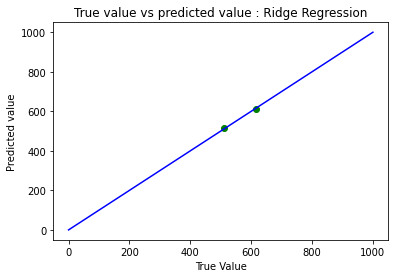

In [ ]:
rid_regressor = Ridge(alpha=1.0)
rid_regressor.fit(Xtrain, ytrain)
y_pred_rid = rid_regressor.predict(Xtest)

x = np.linspace(0,1000,100)
y = x
plt.plot(x, y, '-b')
plt.scatter(ytest, y_pred_rid, c = 'green')
plt.xlabel("True Value")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Ridge Regression")
plt.show()

In [ ]:
metrics_ridge = ModelEvaluation(ytest, y_pred_rid)
pd.DataFrame({'Ridge':metrics_ridge}).transpose()

,MAE,MSE,R2,RMSE
Ridge,3.407679,11.637134,0.995612,3.411324


## Lasso Regression
**Lasso Regression**
: It's a regression model that tries to reduce the total error, avoiding overfitting by penalizing the coefficients with a regularization parameter multiplied by the sum of absolute errors from the training data set.

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Lasso-regression-($L_1$-regularization))
* [Wikipedia](https://en.wikipedia.org/wiki/Ridge_regression)
* [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) documentation

Let's look how lasso regression performs using all the features.

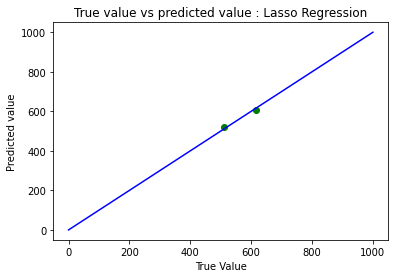

In [ ]:
lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(Xtrain, ytrain)
y_pred_lasso = lasso_regressor.predict(Xtest)

x = np.linspace(0,1000,100)
y = x
plt.plot(x, y, '-b')
plt.scatter(ytest, y_pred_lasso, c = 'green')
plt.xlabel("True Value")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Lasso Regression")
plt.show();

In [ ]:
metrics_lasso = ModelEvaluation(ytest, y_pred_lasso)
pd.DataFrame({'Lasso':metrics_lasso}).transpose()

,MAE,MSE,R2,RMSE
Lasso,6.129636,37.574015,0.985833,6.129765


# Tree Models

## Decision Tree Regression

Decision Tree uses a tree-like model of decisions. It models the data in a tree structure, in which each leaf node leads to the prediction for the dependent variable.

- [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#regression) documentation 


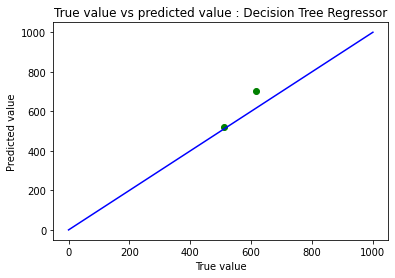

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor()
DTReg.fit(Xtrain, ytrain)
y_pred_DTReg = DTReg.predict(Xtest)

# Plotting Scatter graph to show the prediction
x = np.linspace(0,1000,100)
y = x
plt.plot(x, y, '-b')
plt.scatter(ytest, y_pred_DTReg, c = 'green')
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Decision Tree Regressor")
plt.show()

In [ ]:
metrics_DTR = ModelEvaluation(ytest, y_pred_DTReg)
pd.DataFrame({'DTR':metrics_lasso}).transpose()

,MAE,MSE,R2,RMSE
DTR,6.129636,37.574015,0.985833,6.129765


## Random Forest Regression

Random Forest builds a collection of Decision Trees, where each tree is trained with a random subset of training instances and a random subset of attributes. The final prediction is determined as the average output among the collection of trees.

- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html#Random-Forest-Regression)
- [Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) documentation

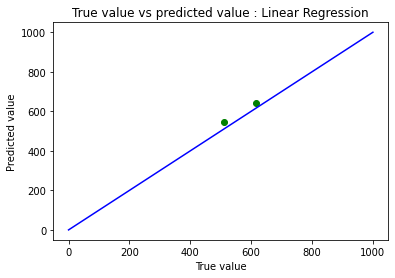

In [ ]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
randomF = RandomForestRegressor(n_estimators = 500, random_state = 0)
randomF.fit(Xtrain, ytrain)
y_pred_rf = randomF.predict(Xtest)

# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
x = np.linspace(0,1000,100)
y = x
plt.plot(x, y, '-b')
plt.scatter(ytest, y_pred_rf, c = 'green')
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [ ]:
metrics_RFR = ModelEvaluation(ytest, y_pred_rf)
pd.DataFrame({'RFR':metrics_lasso}).transpose()

,MAE,MSE,R2,RMSE
RFR,6.129636,37.574015,0.985833,6.129765


Let's now review all the developed models to see which perform the best and order them by the mean squared error in ascending order.

In [ ]:
AllTheMetrics = {'Simple_LR': metrics_simple_lr,
                 'Multiple_LR': metrics_multiple_lr,
                 'Most_Correlated': metrics_most_correlated_lr,
                 'BestK':  metrics_best_k_lr,
                 'Most_Correlated&BestK':  metrics_most_corr_highest_k_lr,
                 'Ridge': metrics_ridge,
                 'Lasso': metrics_lasso,
                 'DecisionTree': metrics_DTR,
                 'RandomForest': metrics_RFR}
pd.DataFrame(AllTheMetrics).transpose().sort_values('MSE')

,MAE,MSE,RMSE,R2
Ridge,3.407679,11.637134,3.411324,0.995612
Most_Correlated&BestK,3.969313,23.698891,4.868151,0.991065
Lasso,6.129636,37.574015,6.129765,0.985833
Most_Correlated,5.649799,53.200488,7.293866,0.979941
Simple_LR,8.125859,130.293918,11.414636,0.950874
RandomForest,29.793000,907.434250,30.123649,0.657862
Multiple_LR,37.818049,1438.576543,37.928572,0.457601
BestK,51.500000,3312.740000,57.556407,-0.249030
DecisionTree,47.500000,3738.500000,61.143274,-0.409558


# Feature Importance
It is slightly different from the feature selection since it's more of a interpreting the model's results. For example it is to understand which variable had more impact on defining the relationship between independant variable and the dependant variable

## Feature Importance Using Coefficients

In linear models, we can use the coefficients to identify the most relevant features used by our model. The higher the coefficient, the more relevant it is to our model. That's why we can also call them weights. This technique only applies if the data was scaled before training our models.

In [ ]:
feature_importance_lr = pd.DataFrame({'Feature':regressor_mr.feature_names_in_,
                                      'Coef': regressor_mr.coef_,
                                      'Abs Coef': np.abs(regressor_mr.coef_)})

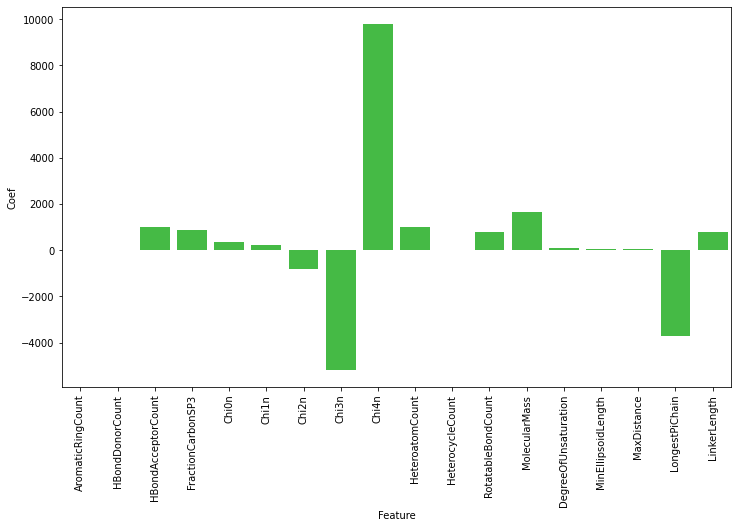

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(data = feature_importance_lr, x='Feature', y='Coef', color='limegreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

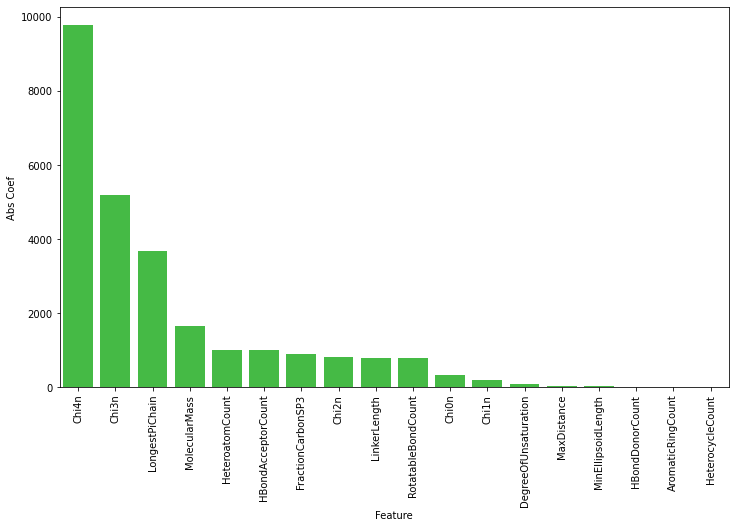

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(data = feature_importance_lr, x='Feature', y='Abs Coef', order=feature_importance_lr.sort_values('Abs Coef', ascending=False)['Feature'], color='limegreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## SHapley Additive exPlanations (SHAP)

[SHAP](https://) is a method derivated from Game Theory (Economics) that brings explainability to machine learning models, showing the contribution of each attribute.

* [SHAP Documentation](https://shap.readthedocs.io/en/)
* [A Unified Approach to Interpreting Model Predictions (Paper)](https://arxiv.org/abs/1705.07874v2)

In [ ]:
# Run this if you do not have the shap library installed
!pip install -q shap 
import shap

In [ ]:
shap.initjs()

Some models like Linear Regression are easy to explain because they use coefficients to predict our target variable, as we have seen previously. However, other models like Random Forest or neural networks are seen as [black box](https://en.wikipedia.org/wiki/Black_box) models since what is happening underneath is hard to understand and interpret.

Let's try to understand our Random Forest Regressor using the SHAP approach.

In [ ]:
explainer = shap.TreeExplainer(randomF)
shap_values = explainer.shap_values(X)

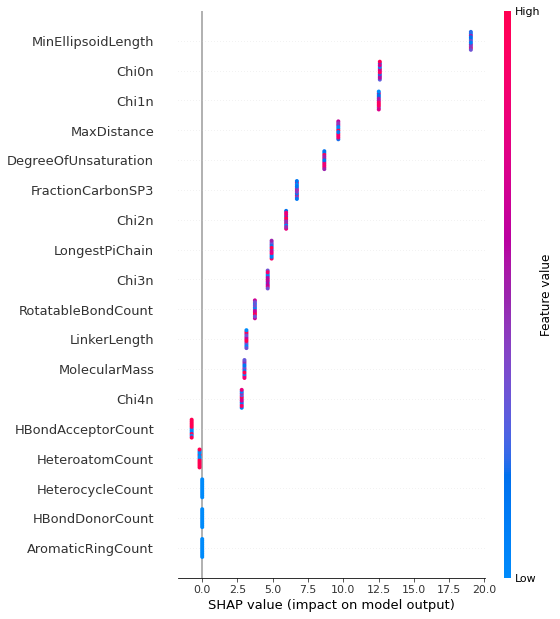

In [ ]:
shap.summary_plot(shap_values, X)

 The graph above sorts our features by their effect on the model. Overall, we see that `MinEllipsoidLength` is the attribute with the highest impact on the model, given that the lower the value, the more negative the effects on the dependent variable. 
 
 On the other hand, `FractionCarbonSP3` presents the opposite behavior; the higher its value, the more negative impact on the model result and vice versa.

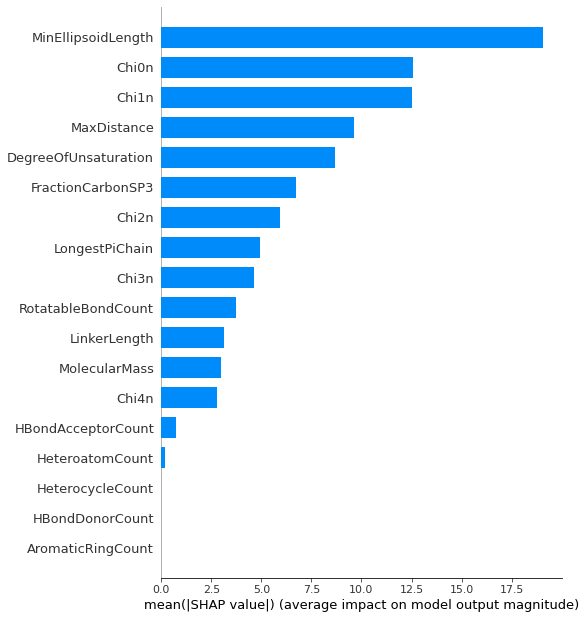

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

The bar plot above presents the absolute result of the SHAP value, quickly explaining the feature impact on the outcome (This approach omits the impact direction for simplicity).